In [28]:
%matplotlib inline
import matplotlib
import seaborn as sns

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [49]:
data = pd.read_csv("/Users/krishmodi/Desktop/Project_355/Brent_Oil_Prices.csv",parse_dates=['Date'],index_col="Date")
data

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


NameError: name 'columns' is not defined

In [50]:
data.describe()

,Price
count,3260.000000
mean,77.391098
std,26.554252
min,9.120000
25%,55.257500
50%,73.380000
75%,105.935000
max,133.180000


In [51]:
data.isnull().sum()

Price    0
dtype: int64

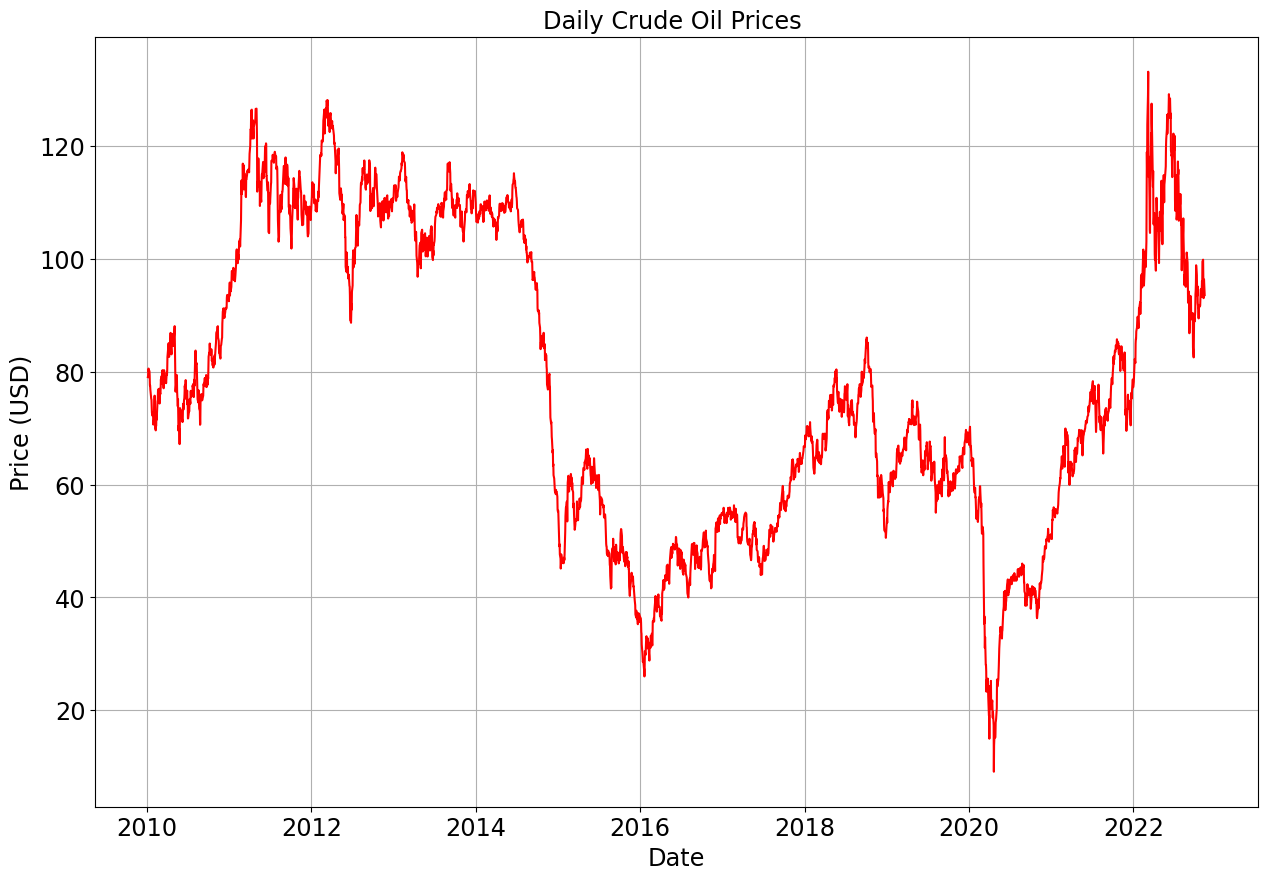

In [52]:
# plotting

plt.plot(Price.index, data['Price'], color='Red', linestyle='-')
plt.title('Daily Crude Oil Prices ')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

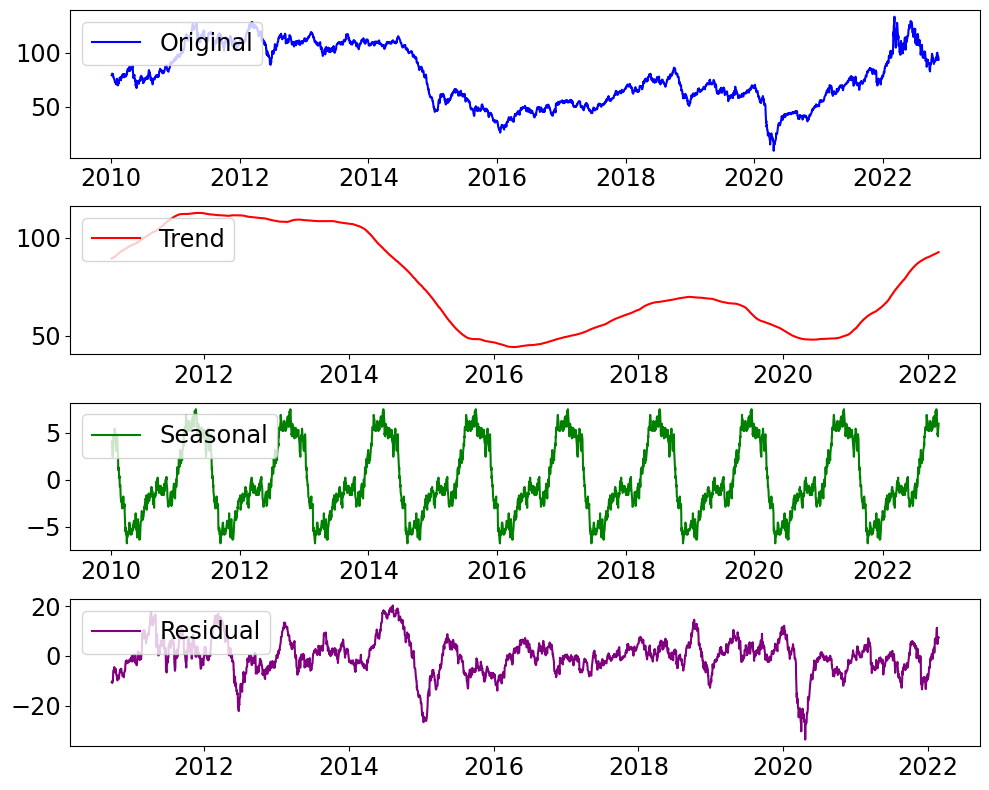

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(data['Price'], model='additive', period=365)  # Assuming seasonal period is 365 daily basis

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data.index, data['Price'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(data.index, result.trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(data.index, result.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(data.index, result.resid, label='Residual', color='purple')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [56]:
data

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


In [64]:
data.rename(columns={'Date': 'date'})
data

,Price
Date,
2010-01-04,79.05
2010-01-05,79.27
2010-01-06,80.14
2010-01-07,80.57
2010-01-08,80.06
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


Text(0.5, 1.0, ' Yearly Avg oil Price ')

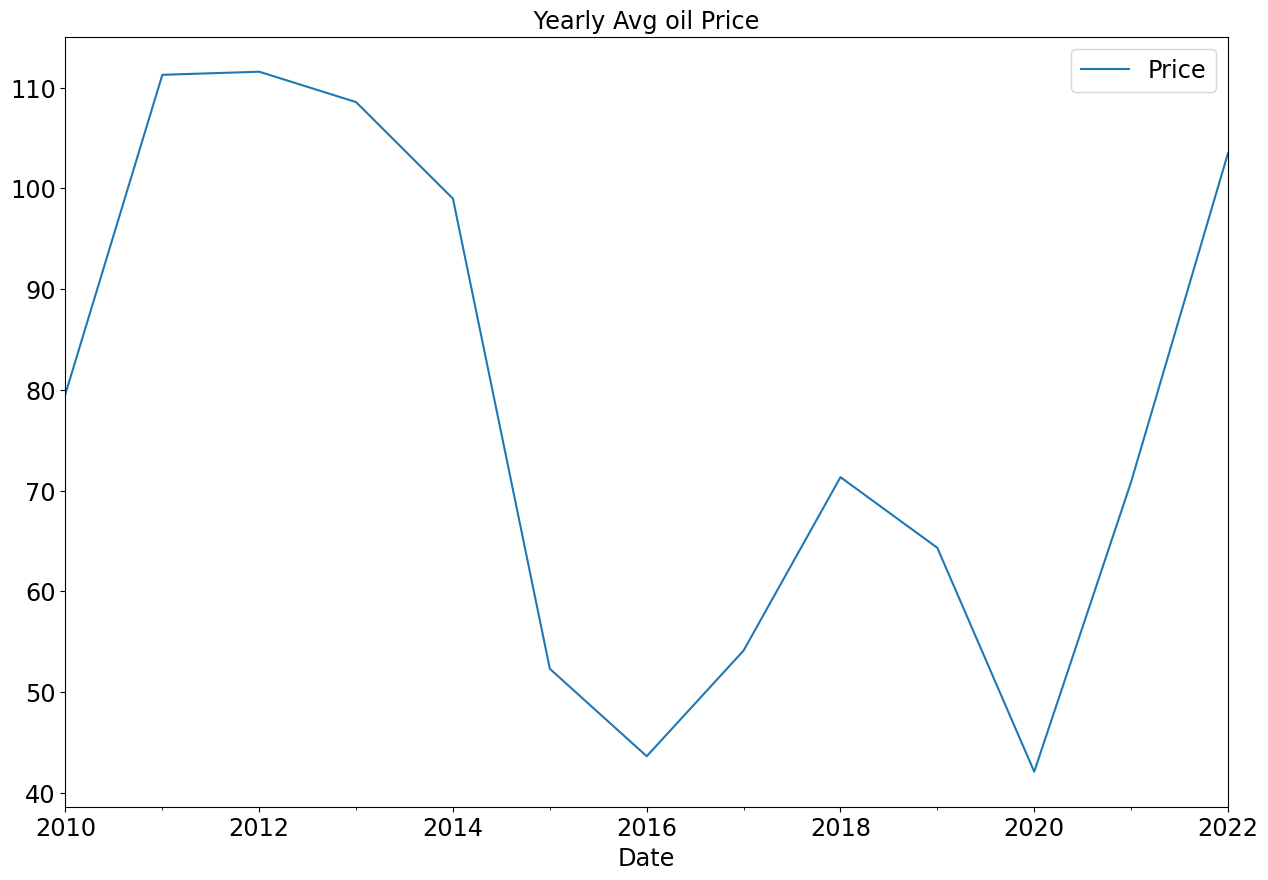

In [65]:
# year wise avg plot 

data_yearly_avg=data.resample('A').mean()

data_yearly_avg.plot()
plt.title(" Yearly Avg oil Price ")


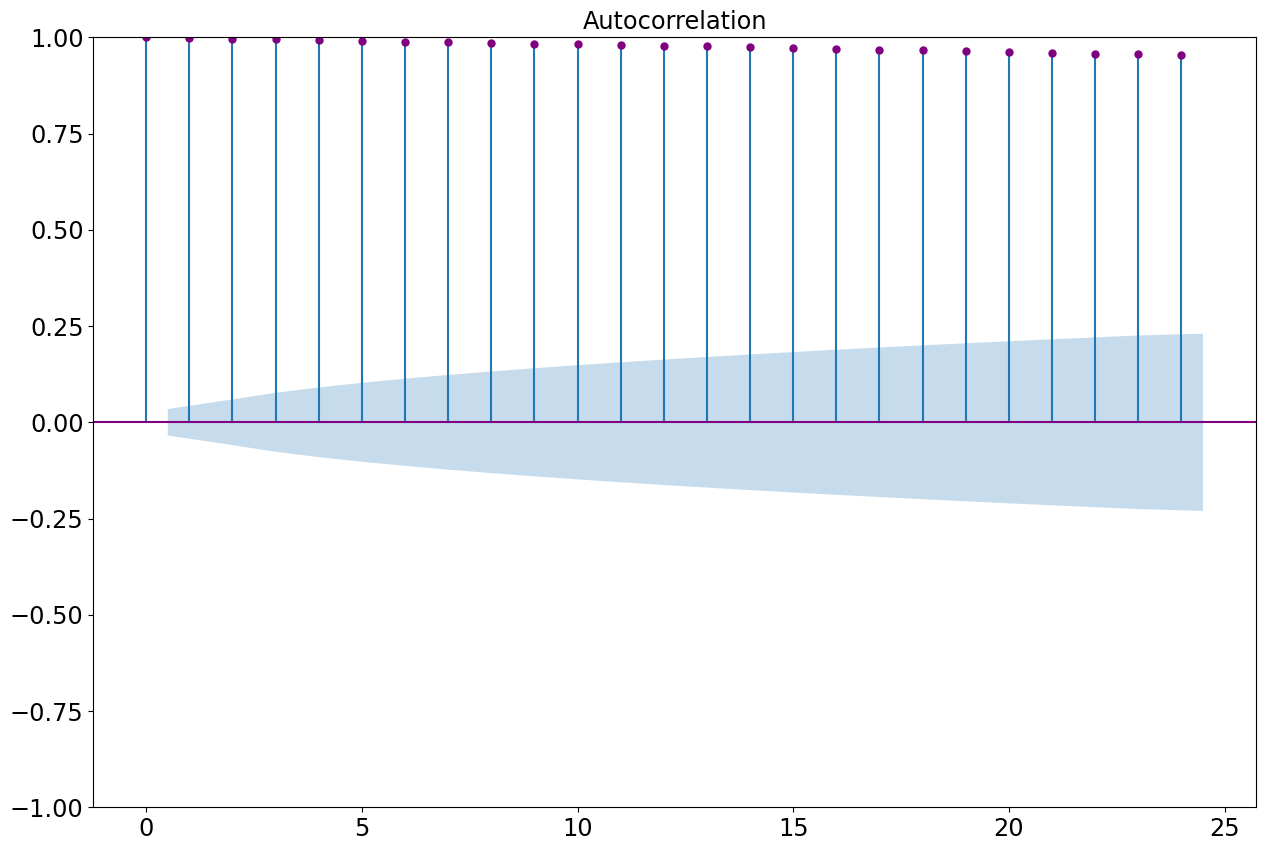

In [66]:
 #auto correlation function
#this code generates a plot showing the autocorrelation function of the 'Price' time series data up to 24 lags.
 #Autocorrelation measures the correlation between a time series and its lagged values, and the ACF plot displays these correlations for different lag values. 
#This plot can help you identify patterns or seasonality in the time series data.

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Price'],lags=24,color="Purple")

plt.show()

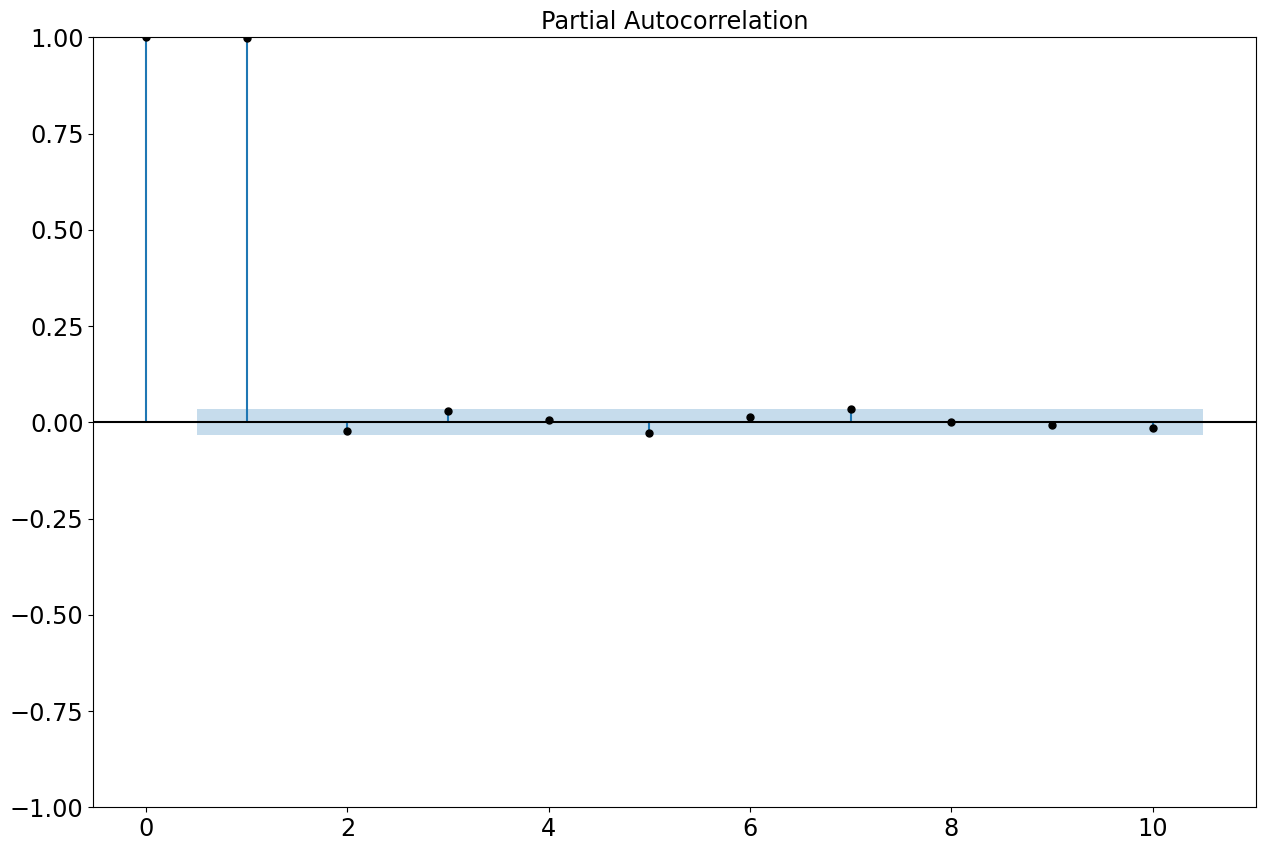

In [69]:
#future values of the series are correlated or heavily influenced by past values.
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Price"],lags=10,color='black')
plt.show()

In [ ]:
##These can be used to determine the ‘p’ and ‘q’ values 